# Part I - Prosper Loan Data Visualization.
## by Daniel Okello

## Introduction
Prosper loan is a peer-to-peer lending platform that provides personal loans to individuals and businesses. As part of this project, I will be analysing a dataset containing over 113,937 loans issued by Prosper between 2005 and 2014. The major goal is to gain insights on how borrower characteristics and loan terms relate with interest rate of the Prosper loans.

To do this I will be using a variety of data visualization tools i.e histograms, scatter plots, heatmaps, to explore the relationships between different variables in the dataset. By creating informative and engaging visualizations, I hope to communicate my findings clearly and effectively.

## Preliminary Wrangling


### Gather Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the dataframe
loans_dataframe = pd.read_csv('prosperLoanData.csv')

### Asess Data

In [3]:
# View a sample of the dataframe
loans_dataframe.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113128,ECFA358421865985921726A,850358,2013-07-24 16:09:11.727000000,NaN,36,Current,NaN,0.23530,0.1979,0.1879,...,-54.71,0.0,0.00,0.00,0.0,1.0,0,0,0.0,17
43689,8CC433835544811980AE3B9,104340,2007-02-27 19:35:55.717000000,AA,36,Completed,2007-09-06 00:00:00,0.10190,0.0950,0.0900,...,-22.46,0.0,0.00,0.00,0.0,1.0,0,0,0.0,106
106619,D05F3562863453380A3B889,674361,2012-11-20 20:11:05.860000000,NaN,60,Current,NaN,0.35097,0.3232,0.3132,...,-47.34,0.0,0.00,0.00,0.0,1.0,0,0,0.0,33
32400,005F3554484683596E52573,619675,2012-08-02 07:18:18.173000000,NaN,36,Current,NaN,0.15833,0.1299,0.1199,...,-167.13,0.0,0.00,0.00,0.0,1.0,0,0,0.0,228
65641,D5F63557893443332683030,643883,2012-09-23 14:59:44.533000000,NaN,36,Chargedoff,2013-05-29 00:00:00,0.35797,0.3177,0.3077,...,-3.12,-27.2,3426.60,3426.60,0.0,1.0,0,0,0.0,60
89057,6D69360373381333571B59F,1237406,2014-03-06 10:40:52.073000000,NaN,60,Current,NaN,0.16840,0.1450,0.1350,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
50281,6C10336669797301184E1D9,31629,2006-08-15 18:44:07.450000000,B,36,Defaulted,2007-05-22 00:00:00,0.22744,0.2200,0.2150,...,-8.10,0.0,4592.93,4592.93,0.0,1.0,0,0,0.0,5
18232,01B23530346546195D6E865,535416,2011-10-25 11:54:32.447000000,NaN,36,Completed,2013-09-30 00:00:00,0.19546,0.1664,0.1564,...,-101.52,0.0,0.00,0.00,0.0,1.0,0,0,0.0,13
84700,E03133854017648010BEBAC,119498,2007-04-05 11:55:12.747000000,A,36,Completed,2007-12-21 00:00:00,0.09560,0.0870,0.0820,...,-3.15,0.0,0.00,0.00,0.0,1.0,0,0,0.0,44
98835,2F163515053446968F30551,507603,2011-05-19 13:43:08.673000000,NaN,36,Completed,2012-06-08 00:00:00,0.18173,0.1599,0.1499,...,-39.43,0.0,0.00,0.00,0.0,1.0,0,0,0.0,101


In [4]:
# View a quick summary of the dataset
loans_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Shape of the dataset
loans_dataframe.shape

(113937, 81)

In [6]:
# Investigate the number of duplicates
loans_dataframe.notnull().sum()

ListingKey                     113937
ListingNumber                  113937
ListingCreationDate            113937
CreditGrade                     28953
Term                           113937
                                ...  
PercentFunded                  113937
Recommendations                113937
InvestmentFromFriendsCount     113937
InvestmentFromFriendsAmount    113937
Investors                      113937
Length: 81, dtype: int64

In [7]:
# View summary statistics of the dataset
loans_dataframe.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
# Create a dataframe from the prosper loans dataset and narrow down the features
 
df = loans_dataframe[['ListingCreationDate','EmploymentStatus','CreditScoreRangeLower','CreditScoreRangeUpper','Term','LoanOriginalAmount','BorrowerRate']]
df

,ListingCreationDate,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,Term,LoanOriginalAmount,BorrowerRate
0,2007-08-26 19:09:29.263000000,Self-employed,640.0,659.0,36,9425,0.1580
1,2014-02-27 08:28:07.900000000,Employed,680.0,699.0,36,10000,0.0920
2,2007-01-05 15:00:47.090000000,Not available,480.0,499.0,36,3001,0.2750
3,2012-10-22 11:02:35.010000000,Employed,800.0,819.0,36,10000,0.0974
4,2013-09-14 18:38:39.097000000,Employed,680.0,699.0,36,15000,0.2085
...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663000000,Employed,700.0,719.0,36,10000,0.1864
113933,2011-11-03 20:42:55.333000000,Employed,700.0,719.0,36,2000,0.1110
113934,2013-12-13 05:49:12.703000000,Employed,700.0,719.0,60,10000,0.2150
113935,2011-11-14 13:18:26.597000000,Full-time,680.0,699.0,60,15000,0.2605


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingCreationDate    113937 non-null  object 
 1   EmploymentStatus       111682 non-null  object 
 2   CreditScoreRangeLower  113346 non-null  float64
 3   CreditScoreRangeUpper  113346 non-null  float64
 4   Term                   113937 non-null  int64  
 5   LoanOriginalAmount     113937 non-null  int64  
 6   BorrowerRate           113937 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 6.1+ MB


In [10]:
# Investigate the credit score upper column
df.CreditScoreRangeUpper.value_counts()

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

In [11]:
#  Investigate the number of null values in the dataframe
df.notna().sum()

ListingCreationDate      113937
EmploymentStatus         111682
CreditScoreRangeLower    113346
CreditScoreRangeUpper    113346
Term                     113937
LoanOriginalAmount       113937
BorrowerRate             113937
dtype: int64

In [12]:
# Investigate the null values in the Employment status column
print(df.EmploymentStatus.value_counts())
print("---------------------------------------------")
print(f'Number of null EmploymentStatus values: {df.EmploymentStatus.isna().sum()}')

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64
---------------------------------------------
Number of null EmploymentStatus values: 2255


In [13]:
#Investigate the CreditScoreRangeLower
df.CreditScoreRangeLower.value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

### Data Quality issues
1. The **ListingCreationDate** datatype has is invalid.
2. The **EmploymentStatus** column contains empty entries.
3. The column namings **BorrowerRate**, **LoanTerm** are messy.

### Tidiness issues
1. **CreditScoreRangeUpper** and **CreditScoreRangeLower** are untidy.

**InterestRate**
**Term**
**CreditScore**

### Clean Data

**Issue #1**: The **ListingCreationDate** datatype has is invalid.

**Define**: Convert the `ListingCreationDate` dataype from object to datetime using the `pd.to_dateTime()` method.

**Code**


In [14]:
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

**Test**

In [15]:
print(df.ListingCreationDate.dtype)

datetime64[ns]


**Issue #2**: The **EmploymentStatus** column contains empty entries.

**Define**: Fill empty entries with the `Other` EmploymentStatus.

**Code**


In [16]:
df.EmploymentStatus.fillna('Other',inplace=True)

**Test**

In [17]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Other             6061
Not available     5347
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [18]:
df.EmploymentStatus.isnull().sum()

0

**Issue #3**: The column namings `BorrowerRate`, `LoanTerm` are messy.

**Define**: Rename the columns as follows.
1. `BorrowerRate` to `InterestRate`
2. `LoanTerm`to `Term`

**Code**

In [19]:
df.rename(columns={'BorrowerRate':'InterestRate','LoanTerm':'Term'},inplace=True)

**Test**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ListingCreationDate    113937 non-null  datetime64[ns]
 1   EmploymentStatus       113937 non-null  object        
 2   CreditScoreRangeLower  113346 non-null  float64       
 3   CreditScoreRangeUpper  113346 non-null  float64       
 4   Term                   113937 non-null  int64         
 5   LoanOriginalAmount     113937 non-null  int64         
 6   InterestRate           113937 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 6.1+ MB


### Tidiness

**Issue #1**: `CreditScoreRangeUpper` and `CreditScoreRangeLower` are untidy..

**Define**: Combine the 2 columns into one single column `CreditScoreRange`, by adding them and separating values with a '-'then drop the `reditScoreRangeUpper` and `CreditScoreRangeLower` columns.

**Code**

In [21]:
# Drop rows with any null entries
df.dropna(inplace=True)

In [22]:
# Convert the CreditScoreRangeLower and CreditScoreRangeUpper to int
df.CreditScoreRangeLower = df.CreditScoreRangeLower.astype(int)
df.CreditScoreRangeUpper = df.CreditScoreRangeUpper.astype(int)

In [23]:
# Creat a CreditScoreRange column by using the CreditScoreRangeLower-CreditScoreRangeUpper
df['CreditScoreRange'] = df.CreditScoreRangeLower.astype(str)+'-'+df.CreditScoreRangeUpper.astype(str)

In [24]:
# Categorize the CreditScoreRange in order
order = ['0-19','360-379','420-439','440-459','460-479','480-499','500-519','520-539','540-559','560-579','580-599','600-619','620-639','640-659','660-679','680-699','700-719','720-739','740-759','760-779','780-799','800-819','820-839','840-859','860-879','880-899']
assert len(order) == 26

In [25]:
# Change the category dtype of the column
df.CreditScoreRange = df.CreditScoreRange.astype('category')

# Set the order categories for the Ticket class
df.CreditScoreRange = df.CreditScoreRange.cat.set_categories(order)

In [26]:
# Drop the unwanted columns
df = df.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'],axis=1)

**Test**

In [27]:
# View the dataframe
df.head(20)

,ListingCreationDate,EmploymentStatus,Term,LoanOriginalAmount,InterestRate,CreditScoreRange
0,2007-08-26 19:09:29.263,Self-employed,36,9425,0.1580,640-659
1,2014-02-27 08:28:07.900,Employed,36,10000,0.0920,680-699
2,2007-01-05 15:00:47.090,Not available,36,3001,0.2750,480-499
3,2012-10-22 11:02:35.010,Employed,36,10000,0.0974,800-819
4,2013-09-14 18:38:39.097,Employed,36,15000,0.2085,680-699
5,2013-12-14 08:26:37.093,Employed,60,15000,0.1314,740-759
6,2013-04-12 09:52:56.147,Employed,36,3000,0.2712,680-699
7,2013-05-05 06:49:27.493,Employed,36,10000,0.2019,700-719
8,2013-12-02 10:43:39.117,Employed,36,10000,0.0629,820-839
9,2013-12-02 10:43:39.117,Employed,36,10000,0.0629,820-839


In [111]:
# Check the dataframe for Cleanliness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113346 entries, 0 to 113345
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingCreationDate  113346 non-null  object 
 1   EmploymentStatus     113346 non-null  object 
 2   Term                 113346 non-null  int64  
 3   LoanOriginalAmount   113346 non-null  int64  
 4   InterestRate         113346 non-null  float64
 5   CreditScoreRange     113346 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.2+ MB


### Save the cleaned dataset into a CSV file

In [112]:
# Save the cleaned dataset.
df.to_csv('prosperloanclean.csv',index=False)

In [113]:
#Load the data cleaned dataset, and create a dataframe

df = pd.read_csv('prosperloanclean.csv')

df.head()
 

,ListingCreationDate,EmploymentStatus,Term,LoanOriginalAmount,InterestRate,CreditScoreRange
0,2007-08-26 19:09:29.263,Self-employed,36,9425,0.1580,640-659
1,2014-02-27 08:28:07.900,Employed,36,10000,0.0920,680-699
2,2007-01-05 15:00:47.090,Not available,36,3001,0.2750,480-499
3,2012-10-22 11:02:35.010,Employed,36,10000,0.0974,800-819
4,2013-09-14 18:38:39.097,Employed,36,15000,0.2085,680-699


### What is the structure of your dataset?

> The preliminaty dataset is composed of 113937 rows and 81 columns, however I have chosen to work with 7 of the rows for this project.

### What is/are the main feature(s) of interest in your dataset?
> I am interested in finding how borrower characteristics and loan terms relate with interest rate of the Prosper loans.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>  The following are the features for which I have picked interest in
> - **Listing creation date** - The date the listing was created.
> - **Loan original amount** - The origination amount of the loan.
> - **Credit Score Range Upper** - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
> - **Credit Score Range Lower** - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
> - **Term**: The length of the loan expressed in months.
> - **Employment status**: Whether the borrower is employed, self-employed, retired, etc.
> - **Borrower Rate**: The borrower's rate for this loan.


## Univariate Exploration

#### 1. What is the distribution of the interest rates among the loan borrowers?

In [114]:
# Define a generic function for histogram plots

def hist_plot(fig_size, dataset, col, y_label, x_label, title, x_lim=None,bin_size=None):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.hist(dataset[col],bins=bin_size)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title.title())
    if x_lim:
        ax.set_xlim(x_lim)
    plt.show()

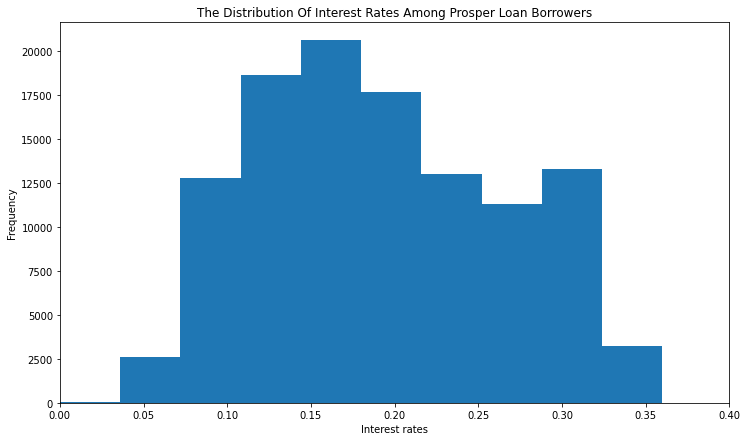

In [115]:
# Plot a histogram of the Interest rate
hist_plot([12,7],df,'InterestRate','Frequency','Interest rates','The distribution of interest rates among Prosper loan borrowers',(0,0.4));

With the default bin sizes, my observation is that the distribution is unimodal with a peak at 15% per annum. Most interest rates for the loans lie between peaks ranging from 12.5% to 17.5% per annum. However, the interest rates range from 0% to 36% for this dataset.

#### How does the distribution of the interest rate appear for a fixed number of bin sizes?

To answer this question, I will plot the a histogram of the interest rates, but adding a tweak to the bin sizes.

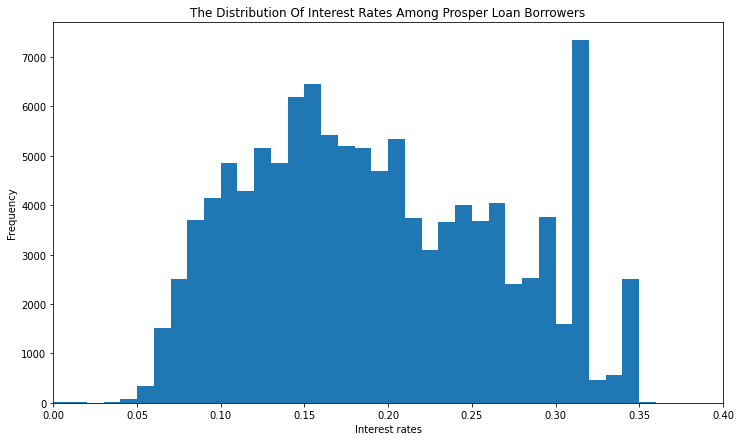

In [116]:
# Customize the bins and plot the histogram
bins = np.arange(0,df.InterestRate.max()+0.01,0.01)
hist_plot([12,7],df,'InterestRate','Frequency','Interest rates','The distribution of interest rates among Prosper loan borrowers',(0,0.4),bins);


When fixed bin sizes are used, an edge peak distribution of interest rates is observed. A relatively normal plot is observed with bimodal peaks at 15% and 16% per anum, along with a spike in interest rates 32% per anum.

#### 2. What are the most common employment statuses among the borrowers?

In [117]:
# Define function to plot barchart
def create_countplot(df, x_column, title, color_index=7, fig_size=(12,7)):
    """
    Creates a countplot using seaborn.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    x_column (str): The name of the column containing the data to be plotted on the x-axis.
    title (str): The title of the plot.
    color_index (int): The index of the color to be used for the plot.
    fig_size (tuple): The size of the figure in inches.

    Returns:
    None.
    """
    plt.figure(figsize=fig_size)
    base_color = sb.color_palette()[color_index]
    sb.countplot(data=df, x=x_column, color=base_color)
    plt.xticks(rotation=90)
    plt.title(title.title())

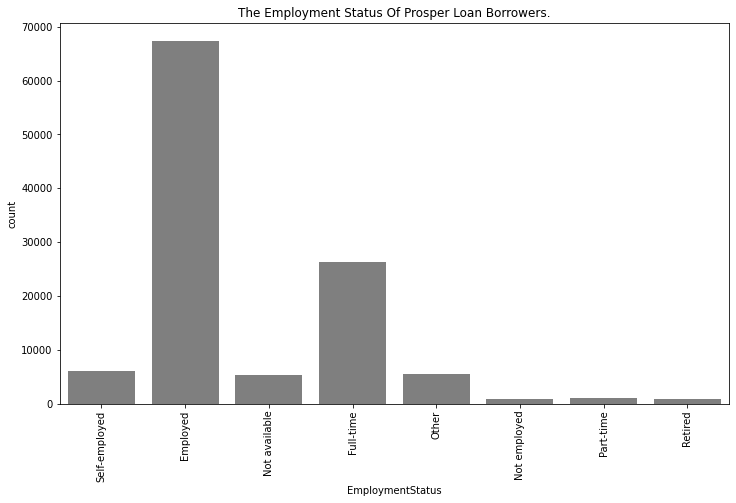

In [118]:
# plot chart
create_countplot(df, 'EmploymentStatus', 'The employment status of Prosper loan borrowers.')

From the observation, most loan borrowers are employed followed by Full-time borrowers, while the non employed are the least loan borrowers. 

#### 3. What is the relative frequency of the loan terms among borrowers?

In [133]:
# Define function to plot Pie Chart
def create_pie_chart(df, column, title, fig_size=(12,7)):
    """
    Creates a pie chart using matplotlib.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    column (str): The name of the column containing the data to be plotted in the pie chart.
    title (str): The title of the plot.
    fig_size (tuple): The size of the figure in inches.

    Returns:
    None.
    """
    plt.figure(figsize=fig_size)
    sorted_counts = df[column].value_counts()
    plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False)
    plt.legend()
    plt.title(title.title())

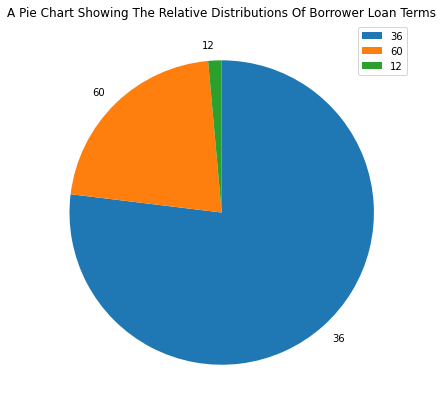

In [134]:
# Plot 
create_pie_chart(df, 'Term', 'A pie chart showing the relative distributions of borrower loan terms')

The pie plot above provides some interesting insights into the distribution of borrower loan terms. We can see that loans with a term length of 36 months make up the largest share of the terms, while loans with a term length of 12 months have the smallest share

#### 4. What is the commnest Credit Score Range amoungst the loan borrowers?

In [135]:
# Define function to plot barchart
def horizontal_countplot(df, y_column, title, fig_size=(12,7),color_index=7):
    """
    Creates a horizontal bar chart using seaborn.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    y_column (str): The name of the column containing the data to be plotted on the y-axis.
    title (str): The title of the plot.
    fig_size (tuple): The size of the figure in inches.

    Returns:
    None.
    """
    plt.figure(figsize=fig_size)
    order = ['0-19', '360-379', '420-439', '440-459', '460-479', '480-499',
     '500-519', '520-539', '540-559', '560-579', '580-599', '600-619',
     '620-639', '640-659', '660-679', '680-699', '700-719', '720-739',
     '740-759', '760-779', '780-799', '800-819', '820-839', '840-859',
     '860-879', '880-899']
    base_color = sb.color_palette()[color_index]
    sb.countplot(data=df, y=y_column,color=base_color,order=order)
    plt.title(title.title())

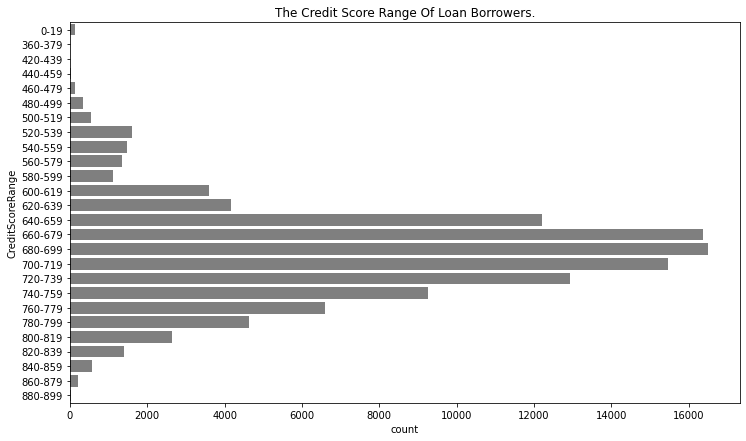

In [136]:
# Plot Credit score range in a bar chart
horizontal_countplot(df, 'CreditScoreRange', 'The credit score range of loan borrowers.')

In [137]:
# Investigate the CreditScore range statistics.
df.CreditScoreRange.value_counts().describe()

count       26.000000
mean      4359.461538
std       5656.075864
min          1.000000
25%        245.500000
50%       1441.500000
75%       6110.500000
max      16492.000000
Name: CreditScoreRange, dtype: float64

The plot above reveals several interesting patterns. First, the graph appears to be bimodal in nature, with two peaks in the distribution of credit score ranges. Specifically, the count of credit score ranges gradually increases from 460-479, at frequency counts of approximately 200, up to 520-539 at frequency counts of approximately 1800, followed by a slight dip at 580-599 atfrequency counts of 1400 , and then a steep rise to 680-699 and 700-719 at frequency counts of 16492, before dropping off sharply at 860-899. 
These patterns show that many loan borrowers on average have a relatively descent Credit score range.
This plot appears to be normal in nature.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- When a histogram is plotted, the interest rates for loan borrowers appear to have a unimodal plot. However, this is only valid when default bin sizes are used. When fixed bin sizes are used, an edge distribution with spikes is observed.
- The credit score range presents a more or less normal plot appearance, with lower values at the extremes and higher values towards the center of the data.
- The borrower term data shows that the largest share of terms is for 36 months, followed by 60 months, and finally 12 months.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In order to work with the dataset, I created a new variable called CreditScoreRange by combining the CreditScoreRangeLower and CreditScoreRangeUpper variables. This was done to form an ordinal datatype that would allow me to investigate the relationship between credit scores and loan interest rates

## Bivariate Exploration

#### 1. Is there any relationship, positive or negative between the interest rate and loan original amount?

In [138]:
# Plot the interest rate against the loan original amount
def rlt_plot(df,x_col,y_col,title,type=None):
    """
    Creates a scatter plot using matplotlib.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    y_col (str): The name of the column containing the data to be plotted on the y-axis.
    x_col (str): The bane of the column containing the data to be plotted on the x-axis.
    title (str): The title of the plot.

    Returns:
    None.
    """
    plt.figure(figsize=[12,7])
    if type == 'scatter':
        plt.scatter(data=df,x=x_col,y=y_col,alpha=1/9)
    else: 
        base_Color = sb.color_palette()[4]
        sb.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha': 1/9},color=base_Color)
    plt.xlabel(x_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title.title());

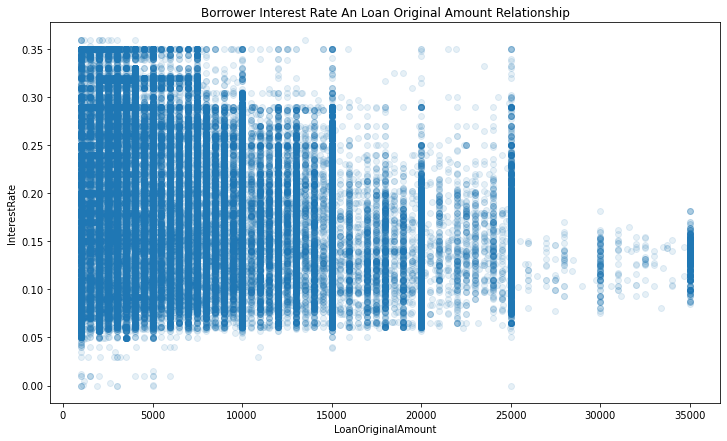

In [139]:
# Plot
rlt_plot(df,'LoanOriginalAmount','InterestRate','Borrower interest rate an loan original amount relationship'.title(),'scatter')

Most of the data falls within a large blob between 5% abd 37% interest rates, 1000 usd and 25000 usd in the original loan amount.Most loans have a low original amount, however they also have a relatively low interest rates. Large original loan amounts have the lowest interest rates. The correlation therefore is said to be negative.

#### How would this relationship appear if I use a regression plot

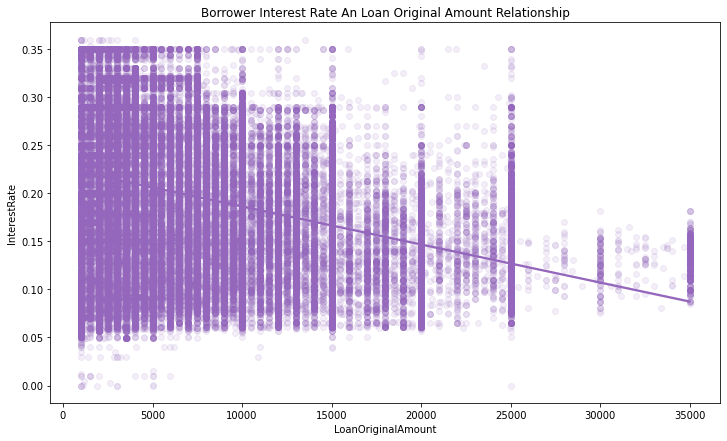

In [140]:
# Create a regression plot
rlt_plot(df,'LoanOriginalAmount','InterestRate','Borrower interest rate an loan original amount relationship')

The regression plot above does solidify my findings from the previous plot. A negative incline line, the regression line shoes that there is a negative relationship between the Loan original amount and the intereest rate.

#### How would the same plot appear with a heatmap?

In [141]:
# Define a function to plot a heatmap
def heatmap(df, x_col, y_col, plot_title):
#      
#     Creates a heat map using matplotlib.

#     Parameters:
#     df (pandas.DataFrame): The dataframe containing the data to be plotted.
#     y_col (str): The name of the column containing the data to be plotted on the y-axis.
#     x_col (str): The bane of the column containing the data to be plotted on the x-axis.
#     plot_title (str): The title of the plot.

#     Returns:
#     None.
    
    plt.figure(figsize=[14, 7])
    plt.hist2d(data=df, x=x_col, y=y_col, cmin=0.5, cmap='viridis_r')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(plot_title.title())
    plt.show()

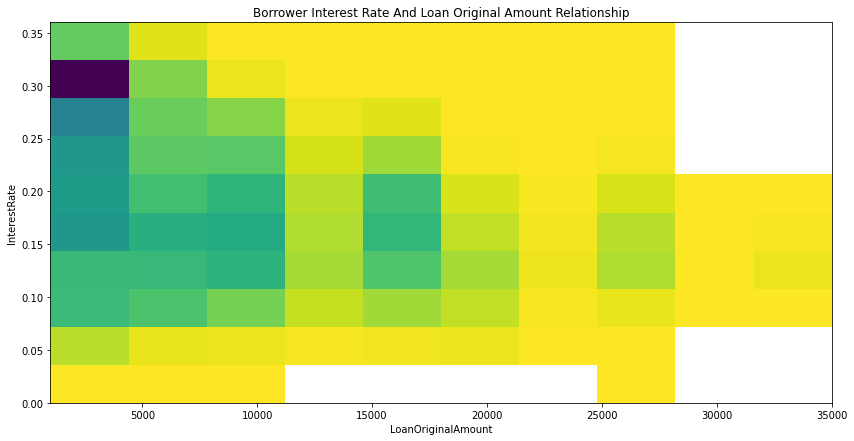

In [142]:
# Plot heatmap
heatmap(df, 'LoanOriginalAmount','InterestRate', 'Borrower interest rate and loan original amount relationship')

The heatmap visualization reveals some interesting trends in the distribution of loan amounts and interest rates. Specifically, we can see that the majority of loans are for amounts under 30,000 USD and have interest rates between 5% and 40% per annum. However, loans with amounts under 5,000 USD generally have higher interest rates, typically falling between 15% and 3% per annum

#### 2. How does the interest rate vary by employment status?

In [143]:
# Define a generic function for the plots
def create_plot(df, x_column, y_column, plot_type, title, color_index=1, fig_size=(12,7),order=None):
    """
    Creates a plot using seaborn.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    x_column (str): The name of the column containing the data to be plotted on the x-axis.
    y_column (str): The name of the column containing the data to be plotted on the y-axis.
    plot_type (str): The type of plot to create. Valid options are 'violin' and 'box'.
    title (str): The title of the plot.
    color_index (int): The index of the color to be used for the plot.
    fig_size (tuple): The size of the figure in inches.

    Returns:
    None.
    """
    plt.figure(figsize=fig_size)
    base_color = sb.color_palette()[color_index]
    if plot_type == 'violin':
        sb.violinplot(data=df, x=x_column, y=y_column, color=base_color)
    elif plot_type == 'box':
        sb.boxplot(data=df, x=x_column, y=y_column, color=base_color,order=order)
    else:
        raise ValueError("Invalid plot type. Must be 'violin' or 'box'.")
    plt.title(title.title())
    plt.xticks(rotation=45)

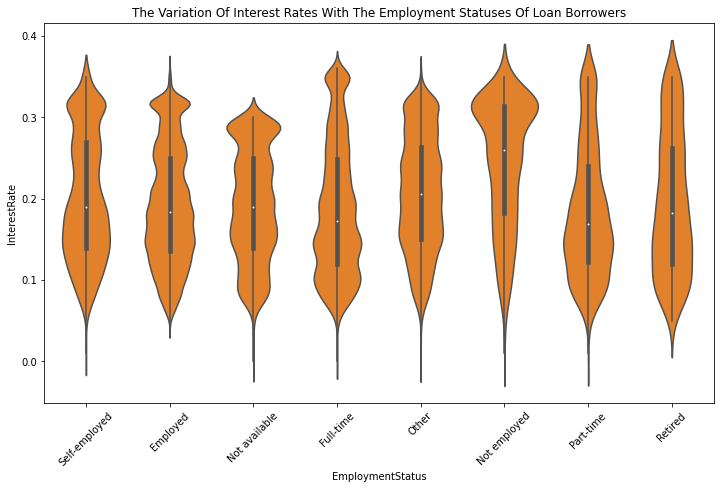

In [144]:
# Create violin plot
create_plot(df, 'EmploymentStatus', 'InterestRate', 'violin', 'The variation of interest rates with the employment statuses of loan borrowers')

The violin plots above show that borrowers who are unemployed on average have loans with the highest interest rates, while those who are full-time employed have loans with lower interest rates.

#### How would the plot turn out if I used a box plot to investigate the variation between interest rate and the employment status?

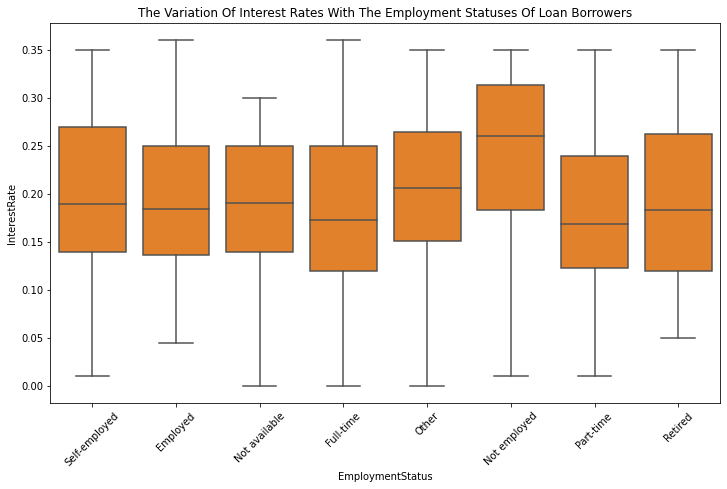

In [145]:
# Create box plots
create_plot(df, 'EmploymentStatus', 'InterestRate', 'box', 'The variation of interest rates with the employment statuses of loan borrowers')

The visualization strongly supports the notion that unemployed borrowers typically have loans with the highest interest rates. However, another employment group that picked my interest is part-time borrowers, whose median interest rates are lower than those of other employment statuses. This suggests that part-time borrowers generally have loans with lower interest rates compared to the other employment status groups.

#### 3. Are there certain combinations of credit score range and loan term that tend to be associated with higher or lower interest rates?  
To be able to answer this, I will plot a heatmap of credit score vs loan term

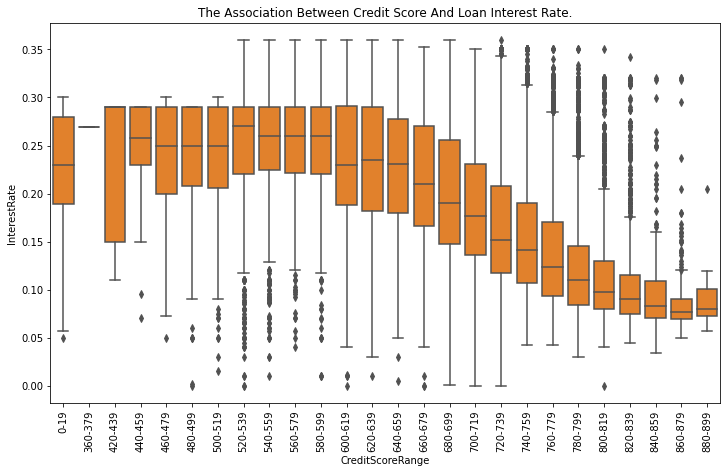

In [146]:
# Create box plot
order = ['0-19', '360-379', '420-439', '440-459', '460-479', '480-499',
     '500-519', '520-539', '540-559', '560-579', '580-599', '600-619',
     '620-639', '640-659', '660-679', '680-699', '700-719', '720-739',
     '740-759', '760-779', '780-799', '800-819', '820-839', '840-859',
     '860-879', '880-899']
create_plot(df,'CreditScoreRange','InterestRate','box','The association between credit score and loan interest rate.',order=order)
plt.xticks(rotation=90); 

This plot presents interesting facts. As observed, loans with low credit score ranges have a higher interest rates as compared to the loans with high credit scores. Therefore loan borrowers who have relatively higher credit scores have loans that have a better interest rates.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The median of the interest rates for  loan borrowers with creditscore range is above 23% between Credit score ranges of 0 to 599, and then gradually decreases to interest rates 12%  at an 899 credit score.
> - There is a negative relationship between the interest rate and the original loan amount. A negative correlation is also observed with a regression plot. This means that the higher the original amount, the lower the interest rates.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No I did not.

## Multivariate Exploration

#### 1. Does the borrower's employment status have an impact on the interest rate for different loan terms? 

In [147]:
# Define function for the plot
def plot_employment_interest(df):
    """
    Plots a point plot showing the relationship between employment status, interest rate, and loan term.

    Parameters:
    df (pandas dataframe): The dataframe containing the data to be plotted.

    Returns:
    None
    """
    plt.figure(figsize=[13,7])
    base_color = sb.color_palette()[2]
    sb.pointplot(data = df, x = 'EmploymentStatus', y = 'InterestRate',hue='Term',linestyles='',dodge=0.3,color=base_color)
    plt.title('Employment status impact on interest rate for different loan terms'.title())

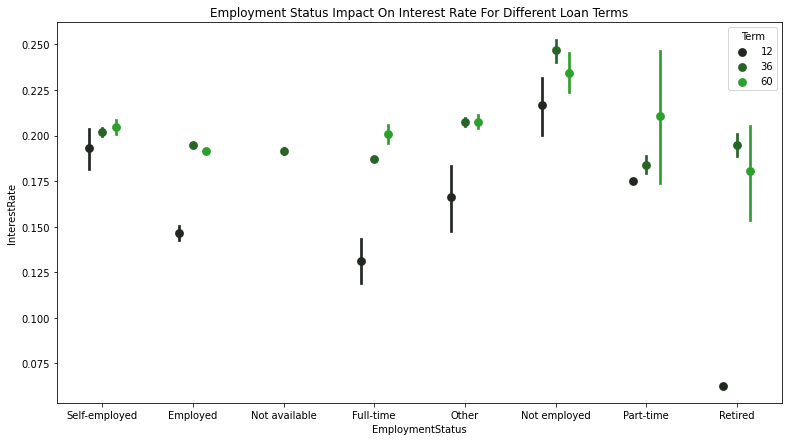

In [149]:
plot_employment_interest(df)

By plotting a pointplot and eliminating the central tendency lines, the observations from the relationship using the pointplot presents interesting facts. Given the norminal nature of the Employment status, no sensible pattern could be defined, however the unemployed borrowers on average have loans with terms which have higher interest rates, while the employed relatively have loans with lower interest rates for borrowers who chose loans with lower terms. 

#### 2. Are there any relationships between the loan original amount, interest rate, and employment status of the borrower?

In [150]:
# Define function for the plot
def mult_plot(df, x_col, y_col, c_col):
    plt.figure(figsize=[12,6])
    sb.stripplot(data=df, x=x_col, y=y_col, hue=c_col, palette='viridis_r', alpha=1/9,jitter=0.2,s=2)
    plt.title('Relationship between {} and {} colored by {}'.format(x_col, y_col, c_col).title())
    plt.xlabel('Employment Status')
    plt.ylabel('Loan Original Amount (USD)')
    
    plt.show()

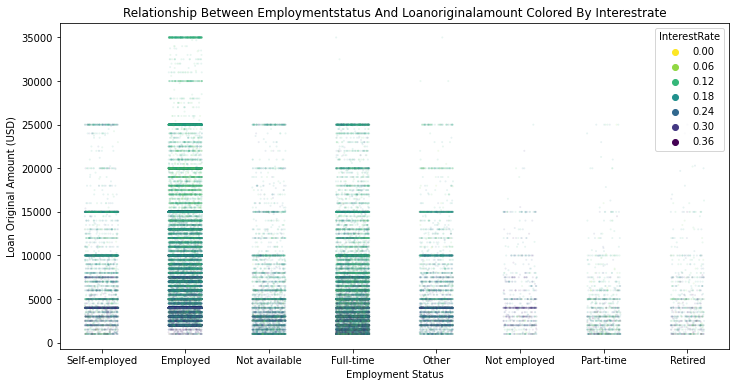

In [151]:
# Plot
mult_plot(df, 'EmploymentStatus', 'LoanOriginalAmount', 'InterestRate')

The plot above shows that Employed borrowers have loans with relatively high original amounts of up to 30,000 USD and relatively low interest rates ranging from 6% per annum to 24% per annum.
In contrast the unemployed have relatively lower original loan amounts ranging from  1000 USD to approximately 26000 USD, with higher interest rates.

Another question that would require answering is how would the relationship above appear if I plotted a facet plot?

In [152]:
# Define function for the plot
def scatter_facet_grid(df, x_col, y_col, facet_col,plot_height=8, plot_aspect=1.2,Title=None):
    """
    Creates a scatter plot using Seaborn's FacetGrid.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    x_col (str): The name of the column containing the data to be plotted on the x-axis.
    y_col (str): The name of the column containing the data to be plotted on the y-axis.
    facet_col (str): The name of the column to facet the plot by.
    plot_height (float): The height of each plot in inches. Default is 8.
    plot_aspect (float): The aspect ratio of each plot. Default is 1.2.

    Returns:
    None.
    """
    g = sb.FacetGrid(data=df, col=facet_col, height=plot_height, aspect=plot_aspect, margin_titles=True, col_wrap=3);
    g.map(plt.scatter, x_col, y_col);
    plt.suptitle(f"{Title}".title(), y = 1.03, fontsize = 14, weight = "bold")
    plt.show();

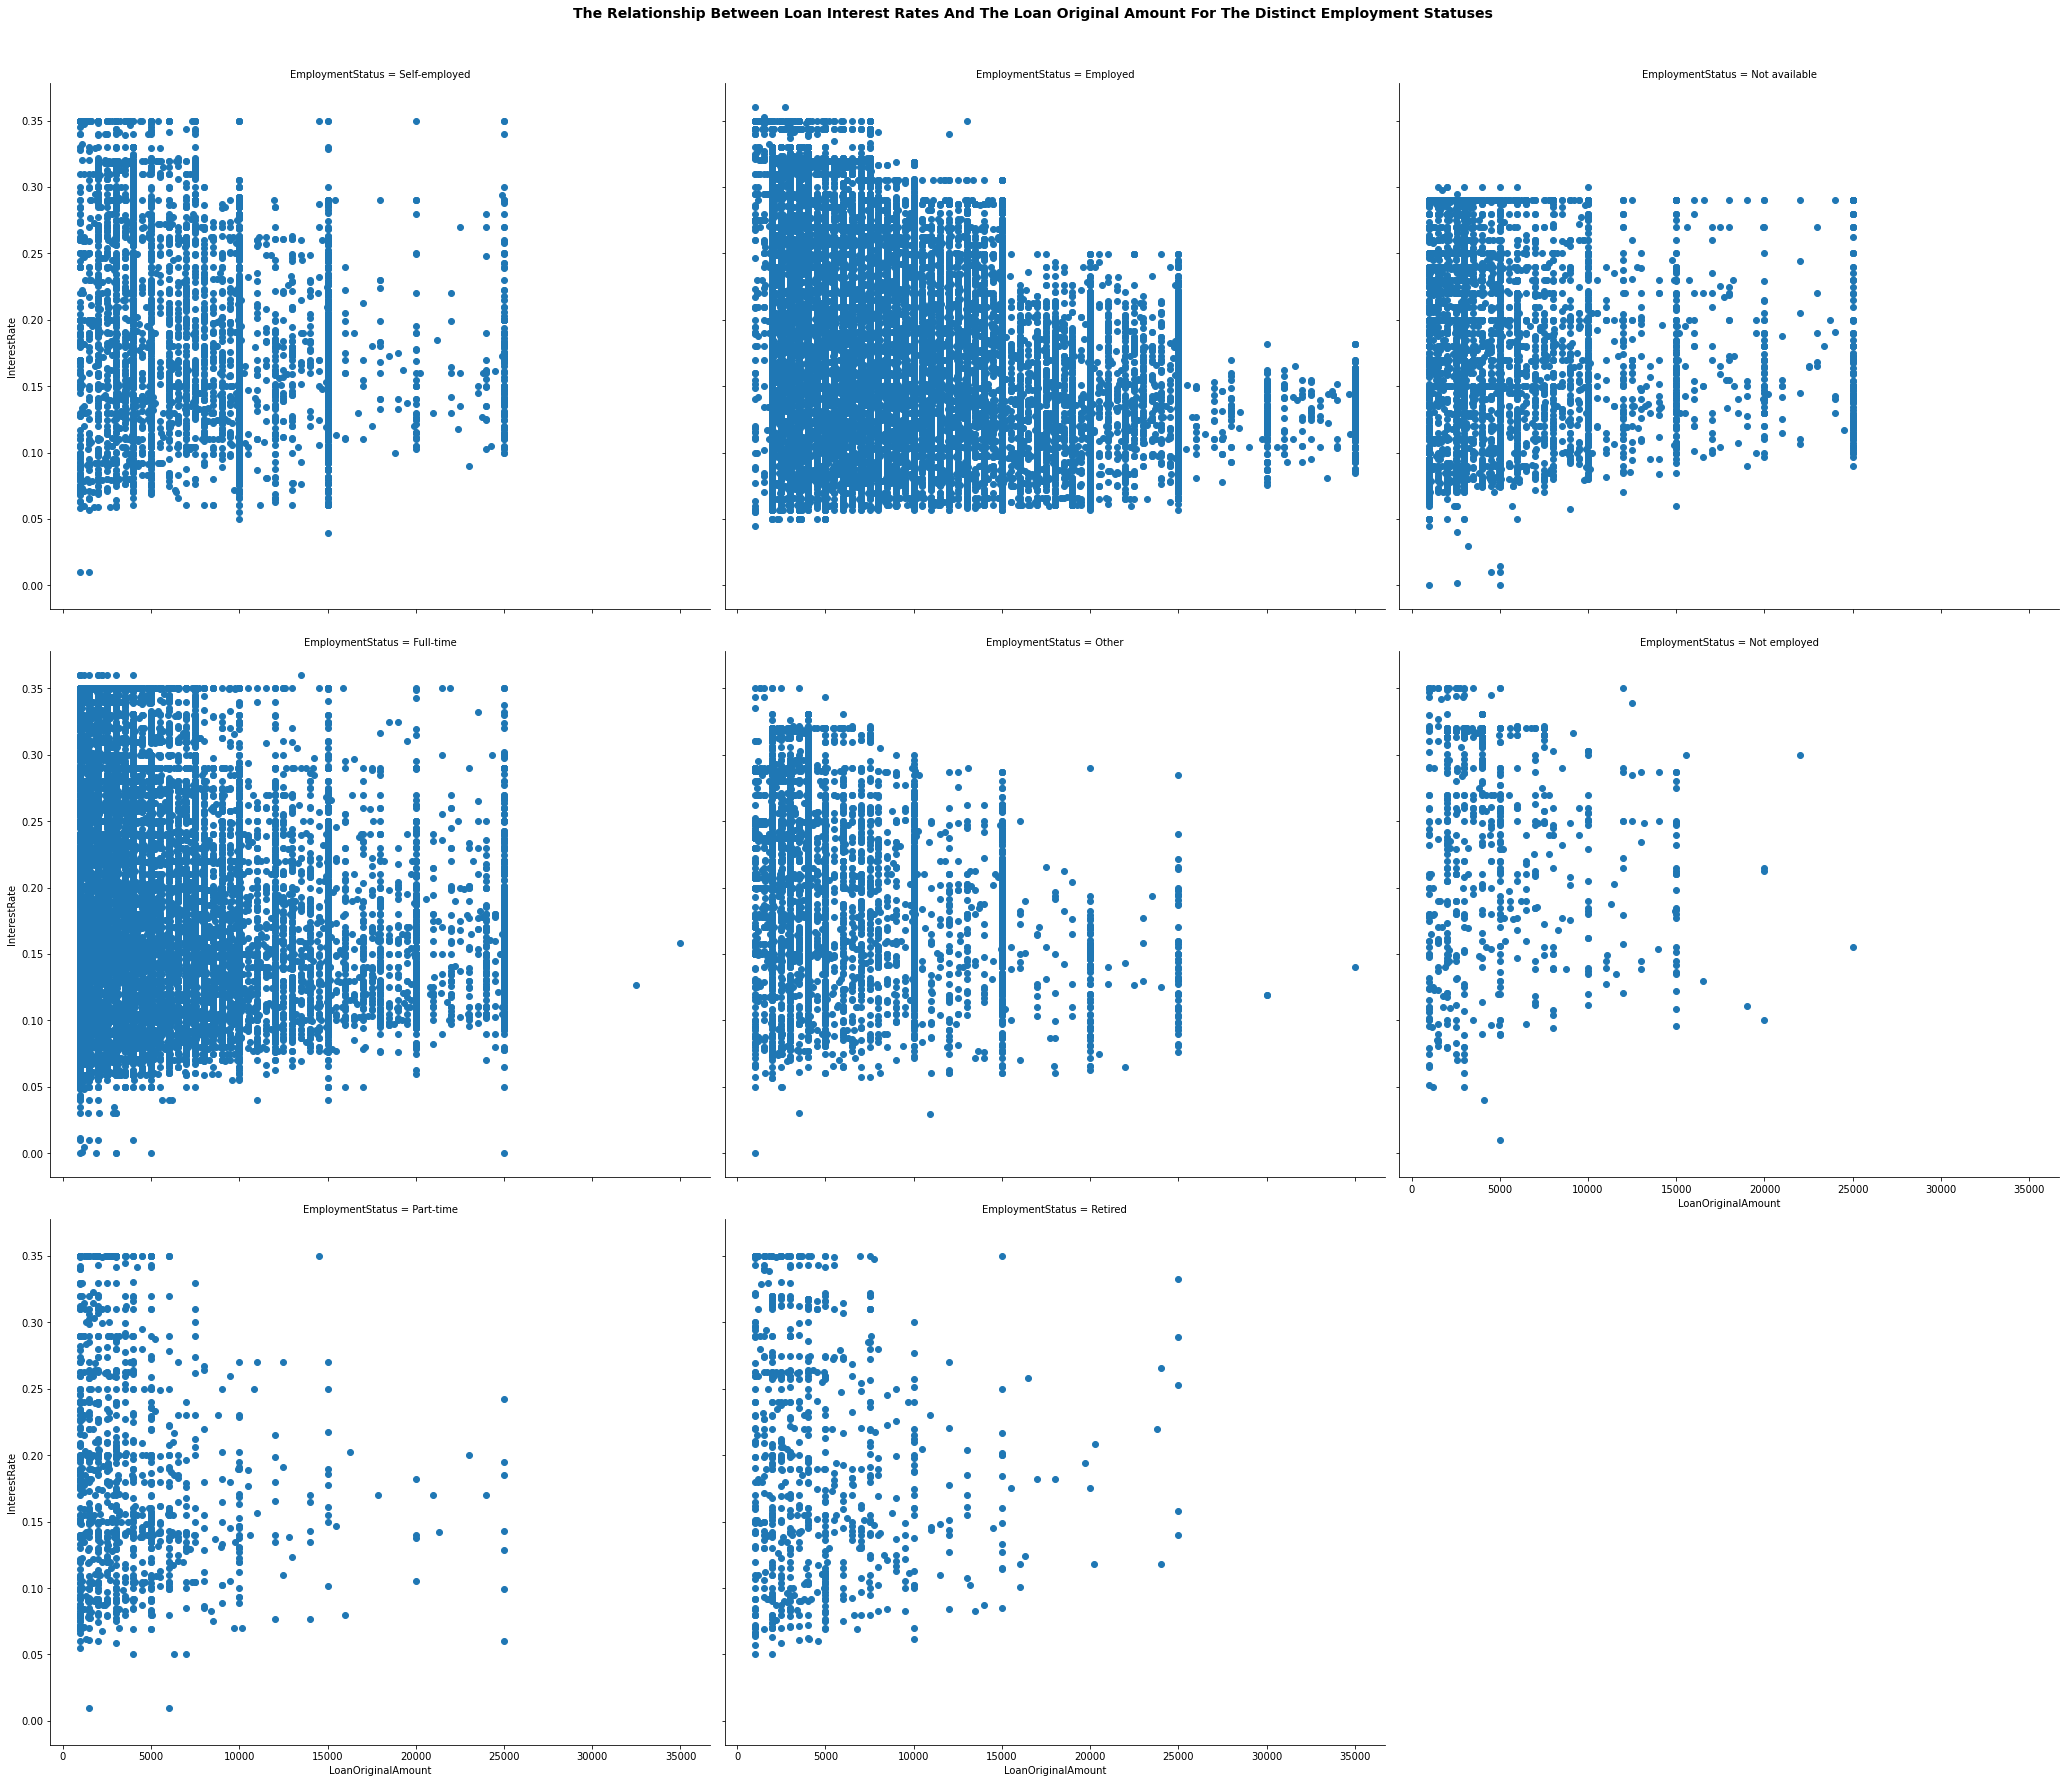

In [153]:
# Create facet plot
plot_title = "The relationship between loan interest rates and the loan original amount for the distinct employment statuses"
scatter_facet_grid(df, 'LoanOriginalAmount', 'InterestRate','EmploymentStatus',plot_height=8, plot_aspect=1.2, Title=plot_title);

The facet plot presents more interesting granular facts while narrowing down the relationship between the interest rates and the loan original amounts for each employment status.
- **Employed, Self employed, Other, Fulltime** - There is a strong negative correlation between the interest rates and the original amount loan amount, with smaller loan amounts having relatively higher.
- **Part-time, retired, Not employed** - There is a relatively wea positive correlation between the interest rates and the original loan amount.


#### 3. How does the credit score range of the borrower affect the interest rate for loans of different durations?

In [154]:
# Define function for the plot
def barplot(df, x_col, y_col, hue_col, figsize=(12, 6), title=None,order=None):
    """
    Creates a barplot using Seaborn's barplot function.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    x_col (str): The name of the column containing the data to be plotted on the x-axis.
    y_col (str): The name of the column containing the data to be plotted on the y-axis.
    hue_col (str): The name of the column to group the data by.
    figsize (tuple): The size of the plot figure. Default is (12, 6).
    title (str): The title of the plot. Default is None.

    Returns:
    None.
    """
    plt.figure(figsize=figsize)
    ax = sb.barplot(data=df, x=x_col, y=y_col, hue=hue_col,order=order)
    ax.legend(loc=8, ncol=3, framealpha=1, title='Term')
    plt.xticks(rotation=90)

    if title:
        plt.title(title.title())

    plt.show()

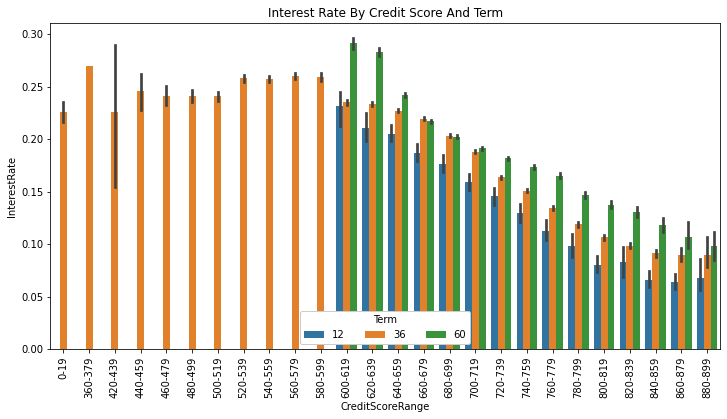

In [155]:
# Create clustered bar chart
plotorder = ['0-19', '360-379', '420-439', '440-459', '460-479', '480-499',
     '500-519', '520-539', '540-559', '560-579', '580-599', '600-619',
     '620-639', '640-659', '660-679', '680-699', '700-719', '720-739',
     '740-759', '760-779', '780-799', '800-819', '820-839', '840-859',
     '860-879', '880-899']
barplot(df, 'CreditScoreRange', 'InterestRate', 'Term', figsize=(12, 6), title='Interest Rate by Credit Score and Term',order=plotorder)

The plot above shows that for Credit Score Ranges 0-19 up to 580-599, the data indicates that loans are only available with a 36-month term, and that loans in these credit score ranges have higher interest rates above 23%. However, for credit score ranges above 600 to 899, the data reveals that loans with all three term options (12, 36, and 60 months) are available, and that interest rates gradually decrease as the credit score range increases

#### 4. How does the the loan term affect the interest rate, for borrowers with different original loan amounts? 

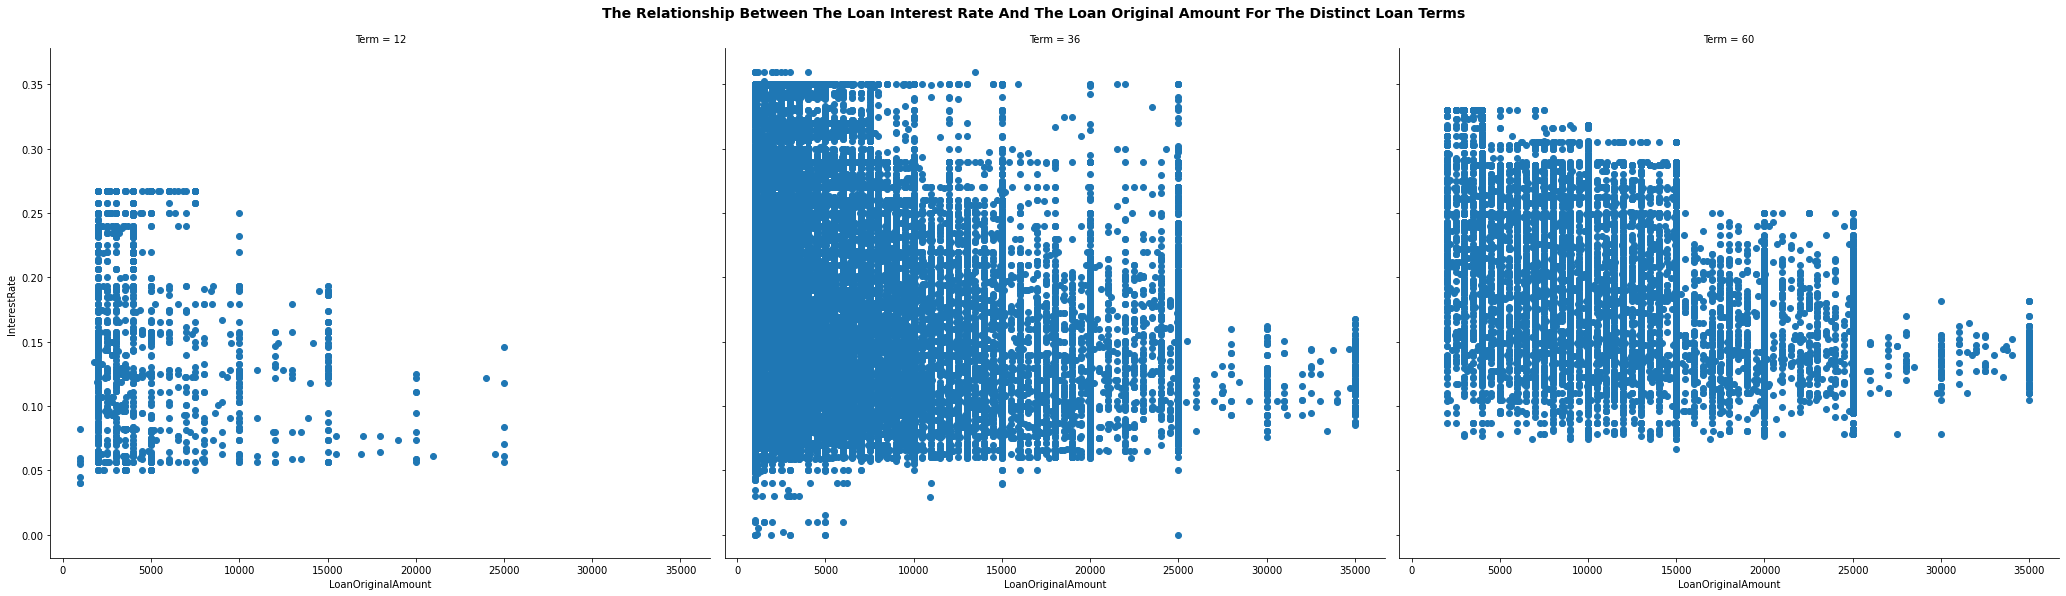

In [156]:
# Create the facet plot
scatter_facet_grid(df, 'LoanOriginalAmount', 'InterestRate','Term',plot_height=8, plot_aspect=1.2, Title="The relationship between the loan interest rate and the loan original amount for the distinct loan terms");

As observed, there is a negative correlation between the original loan amount and the interest rates for the 3 distict loan terms, with the 36 and 60 month terms having a stronger negative correlation,

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Loan borrowers with higher credit score ranges tend to have loans with lower interest rates for the given loan terms.
> - The loan interest rates have a negative correlation with the original loan amounts for the given loan terms. This means that the higher the original loan amount, the lower the interest rates. However, this correlation is dependent on the length of the loan term, with higher loan terms having a stronger negative correlation.
> - For loan borrowers who are employed, self-employed, or in other full-time positions and have higher original loan amounts, the interest rates are lower. In this case, there is a negative correlation between the original loan amounts and the interest rates for these distinct employment statuses, as opposed to part-time, retired, or not employed borrowers.

### Were there any interesting or surprising interactions between features?

> The analysis of the credit score range, interest rate, and loan term features revealed some concerning details. It was found that loans were available for borrowers with credit score ranges from 0 to 599, but only for a 36 month loan term. Additionally, the interest rates for these loans were above 23% per annum. This indicates that borrowers with lower credit scores are presented with loans that have higher interest rates and a longer payback term.

## Conclusions
> After analyzing the dataset and visualizations, the following conclusions can be drawn in response to the question 'How do borrower characteristics and loan terms relate with interest rate of the Prosper loans?':

> - Employment status is a major factor that affects the original loan amount and interest rates for the loan. Employed borrowers tend to get loans with lower interest rates for higher original amounts compared to unemployed borrowers.
> - The loan term for a borrower is determined by their credit score and affects the interest rates for the loan. Borrowers with lower credit scores have longer loan terms and higher interest rates.
> - The original loan amount also affects the interest rates, with higher loan amounts resulting in lower interest rates.
